In [1]:
from mimicplay.scripts.aloha_process.simarUtils import *
import cv2

In [2]:
K_left = np.array(
    [[629.98288647,   0.,         344.41756339],
    [  0.,         626.41876178, 190.13703478],
    [  0.,          0.,           1.        ]]
)
K_right = np.array(
     [[610.19631405,   0.,         396.42232007],
    [  0.,         612.02457804, 181.99943301],
    [  0.,         0.,           1.        ]]
)

# # combine T and R
# Trans = np.zeros((4, 4))
T = np.array([
    [ 0.91974065, -0.14820864,  0.36347124, -0.15570524],
    [ 0.16463295,  0.98624918, -0.01444122, 0.05553373],
    [-0.3563329,  0.07312152,  0.93149348, 0.03665537],
])
P1 = K_left.dot(np.eye(3, 4))
P2 = K_right.dot(T)


T_se3 = np.array([
    [ 0.91974065, -0.14820864,  0.36347124, -0.15570524],
    [ 0.16463295,  0.98624918, -0.01444122, 0.05553373],
    [-0.3563329,  0.07312152,  0.93149348, 0.03665537],
    [0, 0, 0, 1]
])
T_inv = np.linalg.inv(T_se3)
T_inv = T_se3[:3, :]

In [3]:
right_px = np.array([525, 144])[:, None]
right_px_2 = np.array([144, 525])[:, None]
left_px = np.array([360, 110])[:, None]
left_px_2 = np.array([110, 360])[:, None]

In [4]:
P1.round()

array([[630.,   0., 344.,   0.],
       [  0., 626., 190.,   0.],
       [  0.,   0.,   1.,   0.]])

In [5]:
P2.round()

array([[420., -61., 591., -80.],
       [ 36., 617., 161.,  41.],
       [ -0.,   0.,   1.,   0.]])

In [6]:
left_px

array([[360],
       [110]])

In [7]:
right_px

array([[525],
       [144]])

In [8]:
left_px_2

array([[110],
       [360]])

In [9]:
p = cv2.triangulatePoints(P1, P2, left_px, right_px)
print(p / p[3])

[[ 2.44048465]
 [ 2.59293576]
 [-0.23362292]
 [ 1.        ]]


In [10]:
left_frame = cv2.cvtColor(cv2.imread('left_0.jpg'), cv2.COLOR_BGR2RGB)
right_frame = cv2.cvtColor(cv2.imread('right_0.jpg'), cv2.COLOR_BGR2RGB)

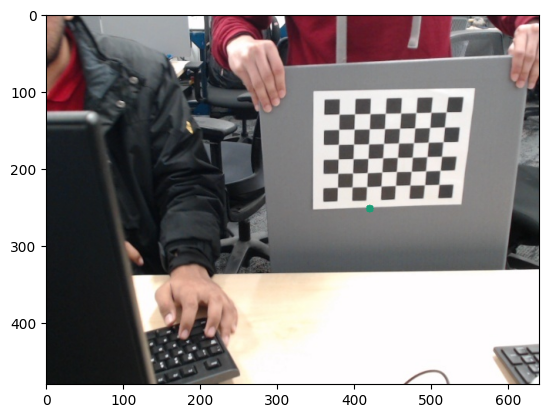

In [11]:
p1 = np.array([0.12, 0.1, 1, 1])
# p1 = np.array([2.44048465, 2.59293576, -0.23362292, 1])
p1_on_cam1 = (P1.dot(p1) / P1.dot(p1)[2])[None, :2]
_ = draw_dot_on_frame(left_frame, p1_on_cam1, show=True, palette='Dark2')


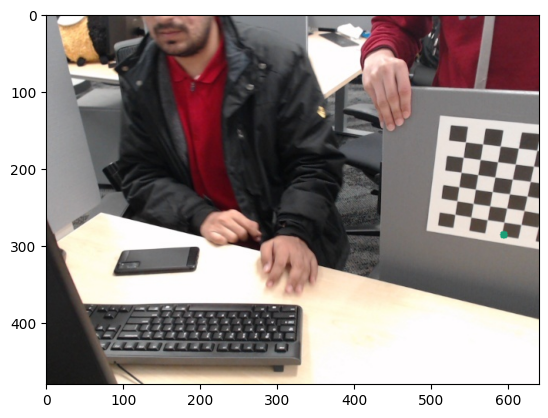

In [12]:
p1_on_cam2 = (P2.dot(p1) / P2.dot(p1)[2])[None, :2]
_ = draw_dot_on_frame(right_frame, p1_on_cam2, show=True, palette='Dark2')

In [13]:
p1_on_cam1, p1_on_cam2

(array([[420.01550977, 252.77891096]]), array([[594.85792015, 286.64349759]]))